In [1]:
#Logistic Regression
#Kumpulan Data Kanker Payudara Wisconsin (Diagnostik)

#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp
plt.rcParams["figure.figsize"] = (10,6)

data = pd.read_csv("data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
data.isna().values.any()

True

In [3]:
print(data.dtypes)

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

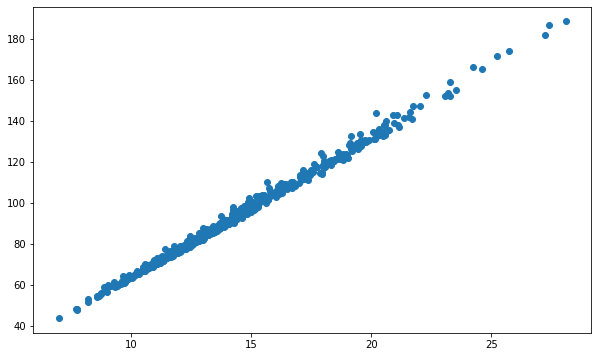

In [4]:
plt.scatter(data['radius_mean'], data['perimeter_mean'])
plt.show()

In [5]:
x_train, x_test, y_train, y_test = train_test_split(data['radius_mean'], data['perimeter_mean'], test_size = 0.20)

In [11]:
#Membuat Model Logistic Regression
#Fungsi pembantu untuk menormalkan data

def normalize(X):
    return X - X.mean()

#Fungsi untuk membuat model
def predict(X, b0, b1):
    return np.array([1/ (1+exp ( -1*b0 + -1*b1*x)) for x in X])

#fungsi untuk melatih model
def logistic_regression(X,Y):
    
    X = normalize(X)
    
    #inisialisasi variabel
    b0 = 0
    b1 = 0
    L = 0.001
    epochs = 300
    
    for epoch in range(epochs):
        y_pred = predict(X, b0, b1)
        #Turunan dari loss wrt b0
        D_b0 = -2 * sum ((Y - y_pred) * y_pred * (1 - y_pred))
        #Turunan dari loss wrt b1
        D_b1 = -2 * sum (X * (Y - y_pred) * y_pred * (1 - y_pred))
        b0 = b0 - L * D_b0
        b1 = b1 - L * D_b1
        
    return b0, b1




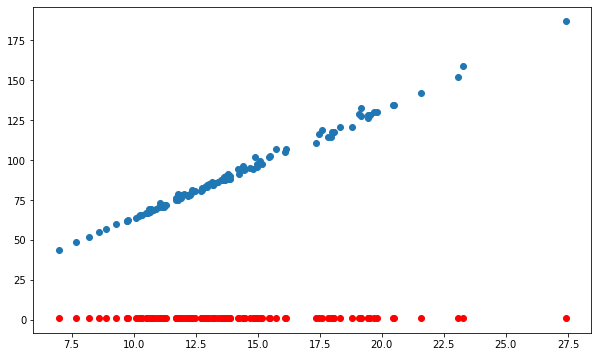

Accuracy = 0.0


In [17]:
#Melatih model 
b0, b1 = logistic_regression(x_train, y_train)

#Membuat prediksi
# X_test = X_test.sort_values()
x_test_norm = normalize(x_test)
y_pred = predict(x_test_norm, b0, b1)
y_pred = [ 1 if p >=0.5 else 0 for p in y_pred ]

plt.clf()
plt.scatter(x_test, y_test)
plt.scatter(x_test, y_pred, c="red")
plt.show()

#Akurasi
accuracy = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test.iloc[i]:
        accuracy += 1
print(f"Accuracy = {accuracy / len(y_pred)}")